In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
im=cv2.imread('pg.jpg') #its read in BGR formet
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
orignal_shape=im.shape
print(im.shape)
aa=int(im.shape[0])
bb=int(im.shape[1])

(1080, 1920, 3)


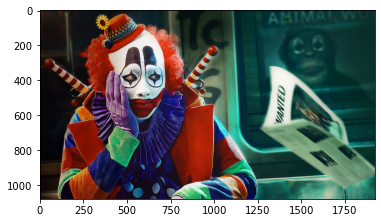

In [3]:
plt.imshow(im)
plt.show()

In [4]:
# flaten each channel of the Image
all_pixals=im.reshape((aa*bb,3))
print(all_pixals.shape)

(2073600, 3)


In [5]:
from sklearn.cluster import KMeans

In [6]:
dominat_color=2
km=KMeans(n_clusters=dominat_color)
km.fit(all_pixals)

KMeans(n_clusters=2)

In [7]:
 centers=km.cluster_centers_

In [8]:
centers=np.array(centers,dtype='uint8')

In [9]:
print(centers)

[[147 176 155]
 [ 41  42  42]]


In [10]:
# Plot what all color are these?

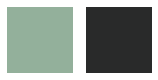

In [11]:
 i=1

plt.figure(0,figsize=(4,2))

colors=[]

for each_col in centers:
    plt.subplot(1,3,i)
    plt.axis(False)
    i+=1
    colors.append(each_col)
    #color Swatch
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_col
    
    plt.imshow(a)

plt.show()

In [12]:
#Segmenting Our Original Image

In [13]:
new_img=np.zeros((aa*bb,3),dtype="uint8")

print(new_img.shape)

(2073600, 3)


In [14]:
km.labels_

array([1, 1, 1, ..., 1, 1, 1])

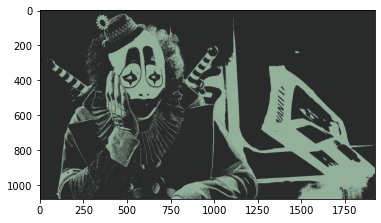

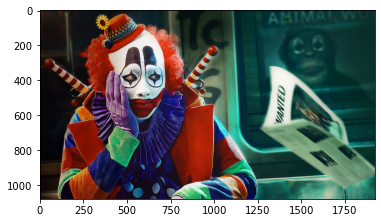

In [15]:
for ix in range(new_img.shape[0]):
    new_img[ix]=colors[km.labels_[ix]]
    
new_img=new_img.reshape((orignal_shape))
plt.imshow(new_img)
plt.show()
plt.imshow(im)
plt.show()